In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached spacy-2.3.9-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.0 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached mlflow-2.1.1-py3-none-any.whl (16.7 MB)
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl

In [ ]:
!pip install numba==0.53

/bin/bash: pip install numba==0.53: command not found


In [ ]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LTV/final_combined.csv')
df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,LTV,SEX,AGE,MonthlyIncome,State,Top-up Month,LTFS-Tradelines,NonLTFS-Tradelines,Primary-Applicants,Co-Applicants,#TypeOfLoans,Contributor-Banks,Bank-lists,#Ownerships-Accepted,Closed-Accounts,Active-Accounts,Disbursed-Amt,Current-Bal,Overdue-Amt,Write-Off-Amount,AuthYear,Last-Reported-Year,BankTenure
0,1,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,61.11,M,49.0,35833.33,MADHYA PRADESH,> 48 Months,4,5,9,0,4,2,"['NAB', 'NBF']",1,5,4,2.751690e+05,1.546315e+05,37873.0,0.0,2012,2020,8
1,2,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,70.00,M,23.0,666.67,MADHYA PRADESH,No Top-up Service,12,1,13,0,7,2,"['PRB', 'NBF']",2,6,7,1.393622e+06,1.478494e+06,0.0,0.0,2012,2020,8
2,3,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,69.77,M,39.0,45257.00,MADHYA PRADESH,12-18 Months,29,2,31,0,8,5,"['NBF', 'PRB', 'CCC', 'COP', 'NAB']",3,19,12,1.196248e+05,1.877423e+05,51745.0,0.0,2017,2023,6
3,7,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,80.92,M,24.0,20833.33,MADHYA PRADESH,> 48 Months,2,2,4,0,2,1,['NBF'],1,2,2,3.181382e+05,6.240000e+05,0.0,0.0,2013,2020,7
4,8,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,71.05,M,56.0,27313.67,CHATTISGARH,36-48 Months,6,1,7,0,3,3,"['NBF', 'NAB', 'PRB']",3,2,5,2.893166e+05,2.435298e+05,35185.0,0.0,2011,2020,9


In [ ]:
df.shape

(128655, 34)

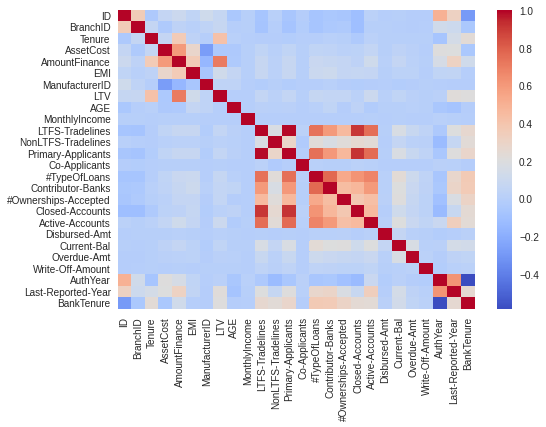

In [ ]:
sns.heatmap(data=df.corr(), cmap='coolwarm')

In [ ]:
correlated_features = set()
corrMatrix = df.corr().round(3)

for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if corrMatrix.iloc[i][j] > 0.8 :
            column_name = corrMatrix.columns[i]
            correlated_features.add(column_name)
            
print("Here are the dependent features")
print(correlated_features)

Here are the dependent features
{'Primary-Applicants', 'Closed-Accounts'}


In [ ]:
df.drop(correlated_features, inplace=True, axis=1)

In [ ]:
df.shape

(128655, 32)

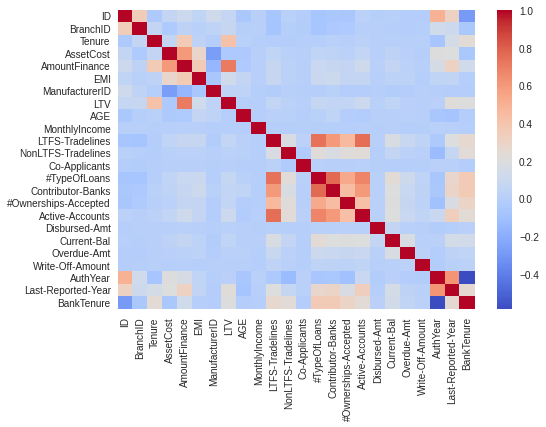

In [ ]:
sns.heatmap(data=df.corr(), cmap='coolwarm')

In [ ]:
df.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Tenure', 'AssetCost', 'AmountFinance', 'EMI',
       'ManufacturerID', 'LTV', 'SEX', 'AGE', 'MonthlyIncome', 'State',
       'Top-up Month', 'LTFS-Tradelines', 'NonLTFS-Tradelines',
       'Co-Applicants', '#TypeOfLoans', 'Contributor-Banks', 'Bank-lists',
       '#Ownerships-Accepted', 'Active-Accounts', 'Disbursed-Amt',
       'Current-Bal', 'Overdue-Amt', 'Write-Off-Amount', 'AuthYear',
       'Last-Reported-Year', 'BankTenure'],
      dtype='object')

In [ ]:
'''cat_features = ['frequency', 'installment_mode', 'loan_status', 'payment_mode','area', 'disbursal_date', 'maturity_date',
       'auth_date', 'asset_id', 'manufacturer_id', 'supplier_id', 'sex',
       'city', 'state', 'zipcode', 'Top-up Month',
       'match_type_last', 'match_type_mode',
       'account_type_last', 'account_type_mode',
       'contributor_type_last',
       'contributor_type_mode', 'ownership_ind_last',
       'ownership_ind_mode', 'account_status_last',
       'account_status_mode']'''

"cat_features = ['frequency', 'installment_mode', 'loan_status', 'payment_mode','area', 'disbursal_date', 'maturity_date',\n       'auth_date', 'asset_id', 'manufacturer_id', 'supplier_id', 'sex',\n       'city', 'state', 'zipcode', 'Top-up Month',\n       'match_type_last', 'match_type_mode',\n       'account_type_last', 'account_type_mode',\n       'contributor_type_last',\n       'contributor_type_mode', 'ownership_ind_last',\n       'ownership_ind_mode', 'account_status_last',\n       'account_status_mode']"

In [ ]:
'''df['year_reported'] = df['year_reported'].astype('str')
df['year_disbursed'] = df['year_disbursed'].astype('str')
df['year_closed'] = df['year_closed'].astype('str')
df['year_last_payment'] = df['year_last_payment'].astype('str')
df['mean_closure_in_months'] = df['mean_closure_in_months'].astype('float')'''

df['Last-Reported-Year'] = df['Last-Reported-Year'].astype(int)

In [ ]:
mymap = {None:0, 'NaT':0}
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [ ]:
df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,LTV,SEX,AGE,MonthlyIncome,State,Top-up Month,LTFS-Tradelines,NonLTFS-Tradelines,Co-Applicants,#TypeOfLoans,Contributor-Banks,Bank-lists,#Ownerships-Accepted,Active-Accounts,Disbursed-Amt,Current-Bal,Overdue-Amt,Write-Off-Amount,AuthYear,Last-Reported-Year,BankTenure
0,1,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,1568,61.11,M,49.0,35833.33,MADHYA PRADESH,> 48 Months,4,5,0,4,2,"['NAB', 'NBF']",1,4,2.751690e+05,1.546315e+05,37873.0,0.0,2012,2020,8
1,2,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,1062,70.00,M,23.0,666.67,MADHYA PRADESH,No Top-up Service,12,1,0,7,2,"['PRB', 'NBF']",2,7,1.393622e+06,1.478494e+06,0.0,0.0,2012,2020,8
2,3,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,1060,69.77,M,39.0,45257.00,MADHYA PRADESH,12-18 Months,29,2,0,8,5,"['NBF', 'PRB', 'CCC', 'COP', 'NAB']",3,12,1.196248e+05,1.877423e+05,51745.0,0.0,2017,2023,6
3,7,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,1060,80.92,M,24.0,20833.33,MADHYA PRADESH,> 48 Months,2,2,0,2,1,['NBF'],1,2,3.181382e+05,6.240000e+05,0.0,0.0,2013,2020,7
4,8,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,1046,71.05,M,56.0,27313.67,CHATTISGARH,36-48 Months,6,1,0,3,3,"['NBF', 'NAB', 'PRB']",3,5,2.893166e+05,2.435298e+05,35185.0,0.0,2011,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,24,470000,265601.0,76800.0,1568,40.17,M,25.0,65333.33,HARYANA,24-30 Months,1,1,0,2,2,"['NBF', 'PRB']",1,2,1.043800e+06,9.338150e+05,0.0,0.0,2018,2020,2
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,24,460000,275630.0,80100.0,1568,59.92,M,25.0,83333.33,HARYANA,No Top-up Service,0,1,0,1,1,['NBF'],1,1,2.756300e+05,7.389000e+04,0.0,0.0,2018,2020,2
128652,143393,Monthly,Arrear,Active,Direct Debit,424,23,545000,300733.0,15277.0,1568,52.38,M,36.0,248500.00,HARYANA,No Top-up Service,3,1,0,2,1,['NBF'],2,3,1.761380e+05,7.706650e+04,0.0,0.0,2018,2020,2
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,35,350000,250962.0,74341.0,1568,50.37,M,37.0,84500.00,HARYANA,No Top-up Service,0,1,0,1,1,['NBF'],1,1,2.506430e+05,1.324870e+05,0.0,0.0,2018,2021,3


In [ ]:
'''df['year_reported'] = df['year_reported'].astype('int')
df['year_disbursed'] = df['year_disbursed'].astype('int')
df['year_closed'] = df['year_closed'].astype('int')
df['year_last_payment'] = df['year_last_payment'].astype('int')'''

df.dtypes

ID                        int64
Frequency                object
InstlmentMode            object
LoanStatus               object
PaymentMode              object
BranchID                  int64
Tenure                    int64
AssetCost                 int64
AmountFinance           float64
EMI                     float64
ManufacturerID            int64
LTV                     float64
SEX                      object
AGE                     float64
MonthlyIncome           float64
State                    object
Top-up Month             object
LTFS-Tradelines           int64
NonLTFS-Tradelines        int64
Co-Applicants             int64
#TypeOfLoans              int64
Contributor-Banks         int64
Bank-lists               object
#Ownerships-Accepted      int64
Active-Accounts           int64
Disbursed-Amt           float64
Current-Bal             float64
Overdue-Amt             float64
Write-Off-Amount        float64
AuthYear                  int64
Last-Reported-Year        int64
BankTenu

In [ ]:
df.isna().sum()

ID                        0
Frequency                 0
InstlmentMode             0
LoanStatus                0
PaymentMode               0
BranchID                  0
Tenure                    0
AssetCost                 0
AmountFinance             0
EMI                       0
ManufacturerID            0
LTV                       0
SEX                      59
AGE                      59
MonthlyIncome           234
State                     0
Top-up Month              0
LTFS-Tradelines           0
NonLTFS-Tradelines        0
Co-Applicants             0
#TypeOfLoans              0
Contributor-Banks         0
Bank-lists                0
#Ownerships-Accepted      0
Active-Accounts           0
Disbursed-Amt             0
Current-Bal               0
Overdue-Amt               0
Write-Off-Amount          0
AuthYear                  0
Last-Reported-Year        0
BankTenure                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df['ID'] = df['ID'].astype(int)
df['BranchID'] = df['BranchID'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['AssetCost'] = df['AssetCost'].astype(int)
df['AmountFinance'] = df['AmountFinance'].astype(float)
df['EMI'] = df['EMI'].astype(float)
df['ManufacturerID'] = df['ManufacturerID'].astype(int)
df['LTV'] = df['LTV'].astype(float)
df['AGE'] = df['AGE'].astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)
df['LTFS-Tradelines'] = df['LTFS-Tradelines'].astype(int)
df['NonLTFS-Tradelines'] = df['NonLTFS-Tradelines'].astype(int)
df['Co-Applicants'] = df['Co-Applicants'].astype(int)
df['#TypeOfLoans'] = df['#TypeOfLoans'].astype(int)
df['Contributor-Banks'] = df['Contributor-Banks'].astype(int)
df['#Ownerships-Accepted'] = df['#Ownerships-Accepted'].astype(int)
df['Active-Accounts'] = df['Active-Accounts'].astype(int)
df['Disbursed-Amt'] = df['Disbursed-Amt'].astype(float)
df['Current-Bal'] = df['Current-Bal'].astype(float)
df['Overdue-Amt'] = df['Overdue-Amt'].astype(float)
df['Write-Off-Amount'] = df['Write-Off-Amount'].astype(float)
df['AuthYear'] = df['AuthYear'].astype(int)
df['Last-Reported-Year'] = df['Last-Reported-Year'].astype(int)
df['BankTenure'] = df['BankTenure'].astype(int)

In [ ]:
df.select_dtypes('O').columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'State', 'Top-up Month', 'Bank-lists'],
      dtype='object')

In [ ]:
cat_f = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'State', 'Top-up Month', 'Bank-lists']

In [ ]:
'''X = df.drop(['ltv'], axis=1)
Y = df['ltv']'''

"X = df.drop(['ltv'], axis=1)\nY = df['ltv']"

In [ ]:
#Y = Y.astype('int')

In [ ]:
# Encoding the independent variables (features)
'''from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
  df[col] = encoder.fit_transform(df[col])'''

'from sklearn.preprocessing import LabelEncoder\n\nencoder = LabelEncoder()\n\nfor col in df.columns:\n  df[col] = encoder.fit_transform(df[col])'

In [ ]:
'''from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()

df_ros, Y_ros = ros.fit_resample(df, df['ltv'])'''
'''X_ros, Y_ros = ros.fit_resample(X, Y)
X_rus, Y_rus = rus.fit_resample(X, Y)'''

df_selected = df[:20000]

In [ ]:
experiment = setup(data=df, target='LTV', categorical_features=cat_f)

,Description,Value
0,session_id,3310
1,Target,LTV
2,Original Data,"(128415, 32)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(89890, 1035)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Frequency',
                                                            'InstlmentMode',
                                                            'LoanStatus',
                                                            'PaymentMode',
                                                            'SEX', 'State',
                                                            'Top-up Month',
                                                            'Bank-lists'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='LTV',
                                      time_features=[])),
                ('imput

In [ ]:
best = compare_models(fold=3, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.8853,24.1447,4.9137,0.8998,0.0939,0.0732,2.7967
rf,Random Forest Regressor,4.0567,26.5075,5.1485,0.8900,0.0983,0.0765,248.0933
et,Extra Trees Regressor,3.9443,26.6694,5.1642,0.8894,0.0989,0.0746,393.4133
gbr,Gradient Boosting Regressor,4.2601,27.5529,5.2491,0.8857,0.0999,0.0803,95.2333
omp,Orthogonal Matching Pursuit,4.5824,31.8011,5.6392,0.8681,0.1223,0.0888,1.8433
br,Bayesian Ridge,4.5833,32.0716,5.6630,0.8670,0.1224,0.0889,22.3200
ridge,Ridge Regression,4.5887,32.1451,5.6695,0.8667,0.1224,0.0889,1.6133
lr,Linear Regression,4.8634,34.8532,5.9031,0.8554,0.1286,0.0946,6.5700
en,Elastic Net,5.0039,35.9800,5.9983,0.8507,0.1309,0.0974,57.3433
lasso,Lasso Regression,5.0062,36.0080,6.0007,0.8506,0.1311,0.0975,33.5667


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3310, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
   

In [ ]:
tuned_lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8714,23.9680,4.8957,0.8996,0.0943,0.0733
1,3.8958,24.3916,4.9388,0.8997,0.0940,0.0732
2,3.8886,24.0746,4.9066,0.9002,0.0935,0.0731
Mean,3.8853,24.1447,4.9137,0.8998,0.0939,0.0732
Std,0.0103,0.1799,0.0183,0.0002,0.0003,0.0001


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3310, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#tuned_lightgbm = tune_model(lightgbm)

In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3310, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


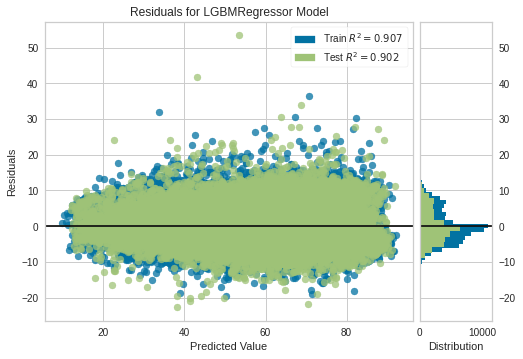

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

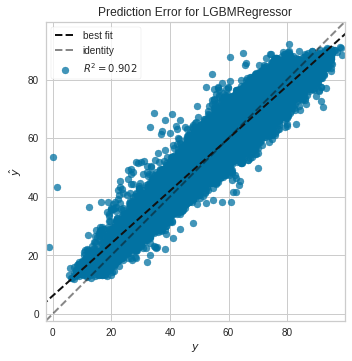

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='error')

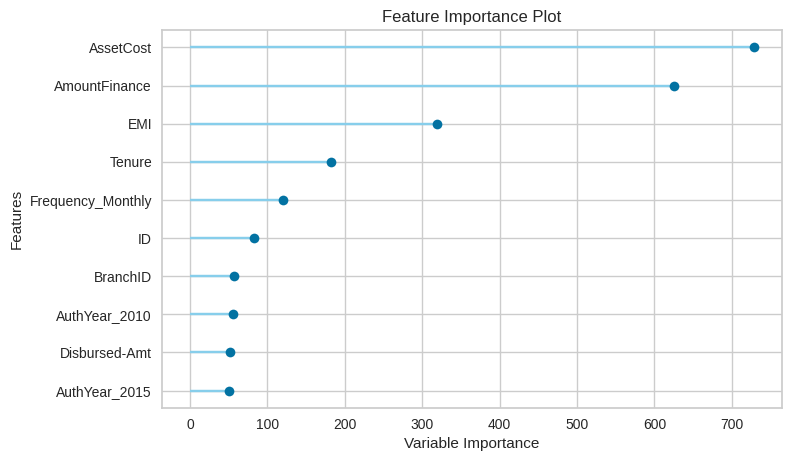

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3310, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=3310, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.8472,23.841,4.8827,0.9018,0.0969,0.0735


,ID,BranchID,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,LTFS-Tradelines,Active-Accounts,...,BankTenure_2,BankTenure_3,BankTenure_4,BankTenure_5,BankTenure_6,BankTenure_7,BankTenure_8,BankTenure_9,LTV,Label
0,104456.0,199.0,36.0,480000.0,280000.0,60450.0,38.0,33333.328125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,58.330002,54.485506
1,124070.0,340.0,60.0,693990.0,495568.0,78000.0,43.0,29166.669922,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,60.169998,66.900469
2,118688.0,150.0,71.0,550000.0,470000.0,70950.0,48.0,16666.669922,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72.550003,81.645390
3,129415.0,202.0,54.0,540000.0,380000.0,34700.0,41.0,41666.671875,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,63.939999,67.812882
4,113380.0,375.0,43.0,660000.0,464625.0,99560.0,53.0,45833.328125,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.610001,64.326880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38520,13993.0,17.0,48.0,535650.0,327054.0,56800.0,29.0,16666.669922,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.450001,54.290004
38521,35072.0,54.0,36.0,490000.0,301006.0,31843.0,24.0,29166.669922,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.930000,58.117582
38522,120957.0,205.0,36.0,545000.0,401426.0,86400.0,28.0,33333.328125,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.660004,67.043847
38523,91205.0,376.0,36.0,430000.0,306443.0,63000.0,55.0,46733.328125,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,71.269997,63.821635
